# Analyzing Video with OpenCV and NumPy

In [1]:
# Import libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
VFILE = "cup.mp4"

In [16]:
# Define generator for reading video
def get_frames(filename):
  video = cv2.VideoCapture(filename)
  while video.isOpened():
    ret, frame = video.read()
    if ret:
      yield frame
    else:
      break

  video.release()
  yield None
  

In [17]:
for f in get_frames(VFILE):
  if f is None:
    break
  cv2.imshow('frame', f)

  if cv2.waitKey(10) == 27:
    break

cv2.destroyAllWindows()

## Define function to geta single video frame

In [13]:
def get_frame(filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
        
    video.release()
    return None

In [18]:
frame = get_frame(VFILE, 80)
print('shape ', frame.shape)
print('pixel at (0,0)', frame[0,0,:])
print('pixel at (150,75)', frame[150,75,:])

shape  (480, 640, 3)
pixel at (0,0) [223 229 233]
pixel at (150,75) [220 228 232]


## Displaying a vide frame

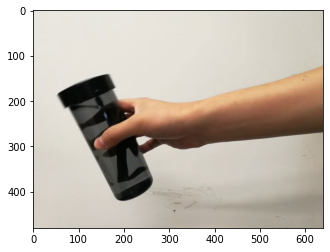

In [20]:
plt.imshow(frame[:,:,::-1])

## Fixing Color convention with OpenCV

pixel at (0,0) [223 229 233]


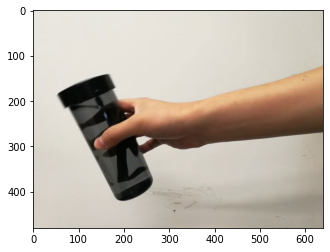

In [21]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print('pixel at (0,0)', frame[0,0,:])
plt.imshow(fix_frame)

## Cropping a video frame

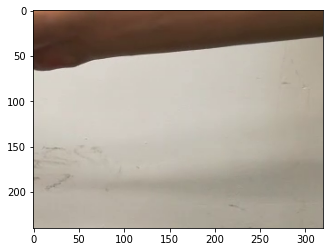

In [22]:
plt.imshow(fix_frame[240:480, 320:640])

## Adjusting Brightness

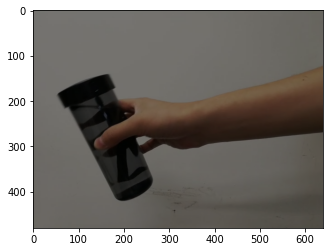

In [24]:
darker = 0.5 * fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker)

## Drawing a circle

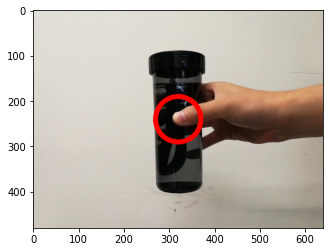

In [29]:
frame = get_frame(VFILE, 200)
cv2.circle(frame, center=(320,240), radius=50, color=(0,0,255), thickness=10)
fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

## Processing an entire video

In [33]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame, 
                text=str(counter),
                org=(100,100), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,
                color=(0,255,0),
                thickness=3
               )
    cv2.imshow('frame', frame) # cv2.imshow is better for many frames. matplotlib is better for a single frame
    if cv2.waitKey(10) == 27:
        break
    counter += 1
    
cv2.destroyAllWindows()

## Generating a new video file

In [34]:
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter('new.mp4', fourcc, 20, (640,480))

counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame, 
                text=str(counter),
                org=(100,100), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,
                color=(0,255,0),
                thickness=3
               )
    video_out.write(frame)
    counter += 1
    
video_out.release()

## Finding the total frame count

In [35]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()

print('frame count ', count)

frame count  217


## Creating a collage

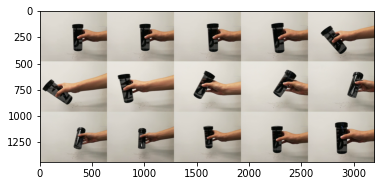

In [36]:
skip_frames = count // 15

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1
    
row1 = np.concatenate(frames[0:5], axis=1)
row2 = np.concatenate(frames[5:10], axis=1)
row3 = np.concatenate(frames[10:15], axis=1)
collage = np.concatenate((row1, row2, row3), axis=0)
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.imshow(collage)